In [1]:
import colorstamps
import matplotlib.pyplot as plt
import numpy as np

# Colormaps in sets of three 
This notebook generates colormaps that are in sets of three

The colormaps are generated from the ‘CAM02-LCD’ colorspace as defined in the package colorspacious (https://pypi.org/project/colorspacious/)

https://github.com/trygvrad/colorstamps/ is used for easy access to this colorspace and visualization

In practice, we are are looking for three vectors at 120° angles in the following colorspace:

In [2]:
colorbar_dict = {}

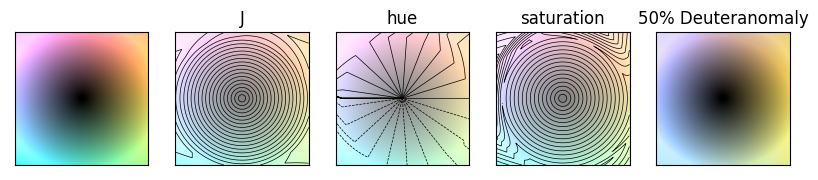

In [3]:
cmap = colorstamps.stamps.get_var_J(l = 512, J = (110,0))
stamp = colorstamps.Stamp(cmap)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
stamp.eval(axes)

We need to find three vectors at 120° each in this colorspace 

Once we have selected three vectors, we need to make sure they form a greyscale (r=g=b) when they are combinde linearly

Since the vectors are defined at 120° in ‘CAM02-LCD’ colorspace this is not guaranteed when they are added together in RGB colorspace, and we apply a correction for this

We also need to adjust the colormaps so that they start at (0,0,0) and end at (1,1,1) when combined

We then extract the final colormaps from the 3D matrix

# Colorbars 3VarAddA

max before adjustment: [0.92200086 1.05140777 1.02027102]
max after adjustment: [0.99789322 0.99789322 0.99789322]
values <0: 0
values >1: 131003
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.62917443 0.63900061 0.64837441]
 [0.70443497 0.72893994 0.75310009]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.63065754 0.64080947 0.62553021]
 [0.70863221 0.73335431 0.69520188]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.65140887 0.63143076 0.63733622]
 [0.75955051 0.71032345 0.72431573]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

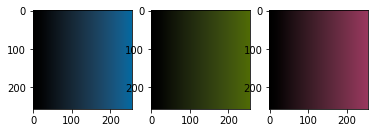

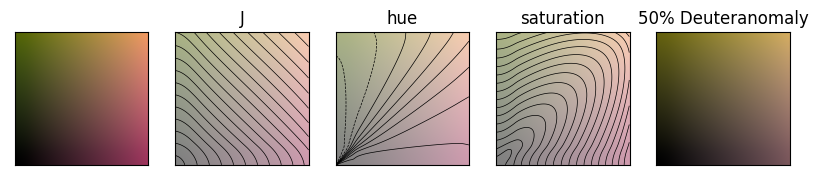

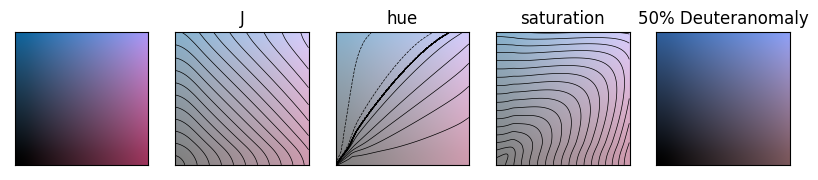

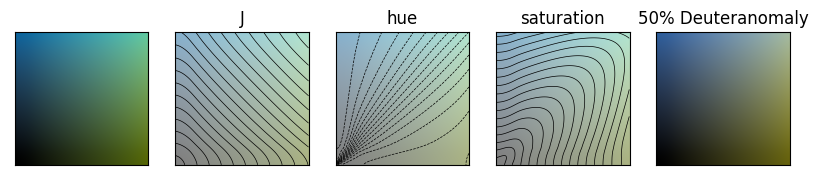

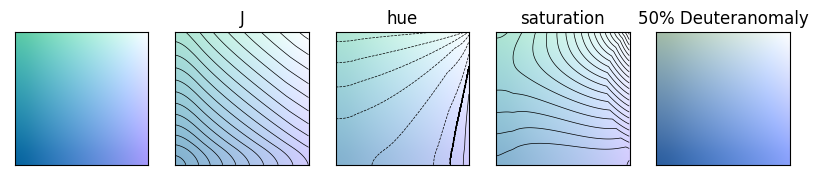

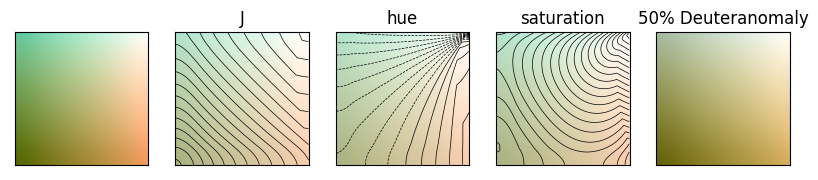

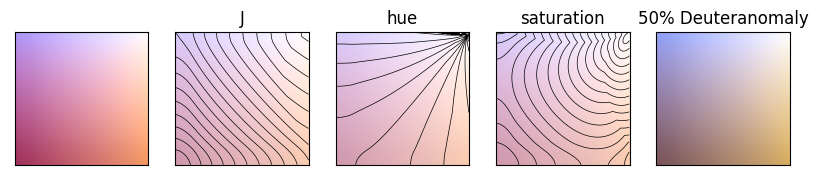

In [4]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (56, 0.75) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddA0'] = cmap[:,0,0]
colorbar_dict['3VarAddA1'] = cmap[0,:,0]
colorbar_dict['3VarAddA2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddA0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddA1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddA2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddB

max before adjustment: [0.99648715 1.00326172 0.99223034]
max after adjustment: [0.9973264 0.9973264 0.9973264]
values <0: 0
values >1: 35817
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.61944175 0.63655929 0.63474461]
 [0.68292336 0.72634115 0.72121122]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.64238384 0.62943923 0.61687409]
 [0.74046786 0.70833754 0.67788163]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.63401722 0.6298443  0.64422411]
 [0.72043808 0.70915062 0.74473646]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

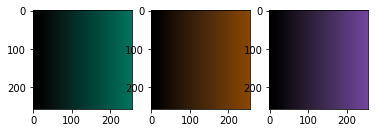

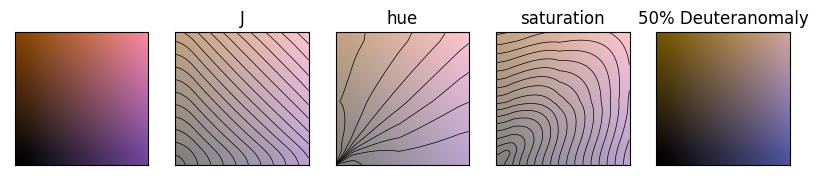

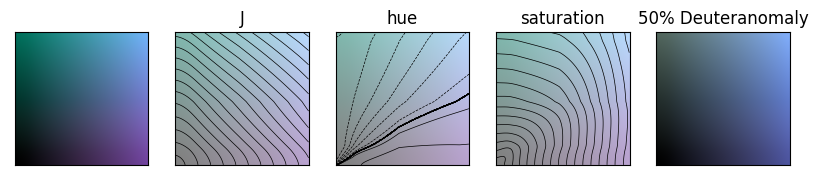

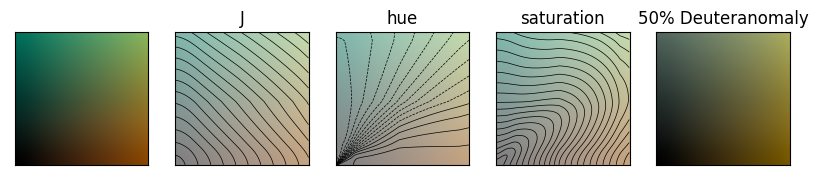

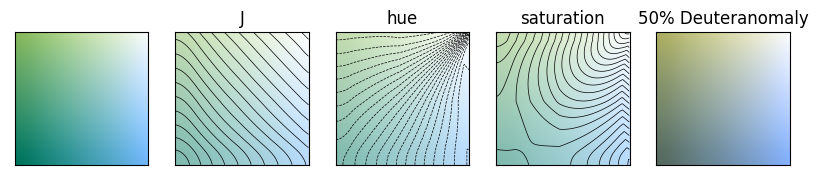

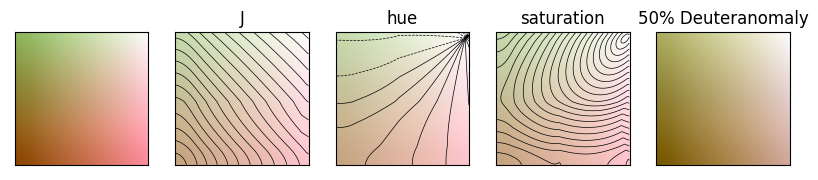

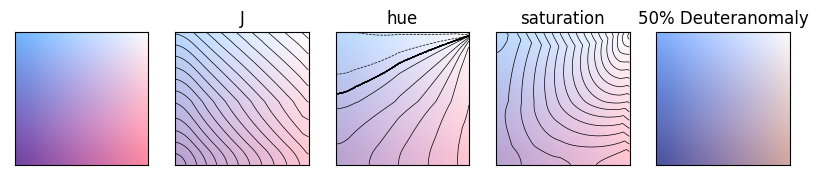

In [5]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (53.8, 0.75) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddB0'] = cmap[:,0,0]
colorbar_dict['3VarAddB1'] = cmap[0,:,0]
colorbar_dict['3VarAddB2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddB0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddB1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddB2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddC

max before adjustment: [1.51364872 1.52009417 1.5019383 ]
max after adjustment: [1.51189373 1.51189373 1.51189373]
values <0: 0
values >1: 9535354
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.67413334 0.68500076 0.69617879]
 [0.79261627 0.82074862 0.84959123]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.67507967 0.6873589  0.67010141]
 [0.79644662 0.82632517 0.7819704 ]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.69958791 0.67644126 0.68252071]
 [0.85711043 0.79909954 0.8146117 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

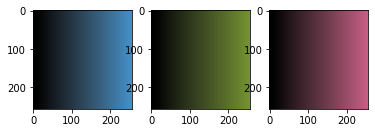

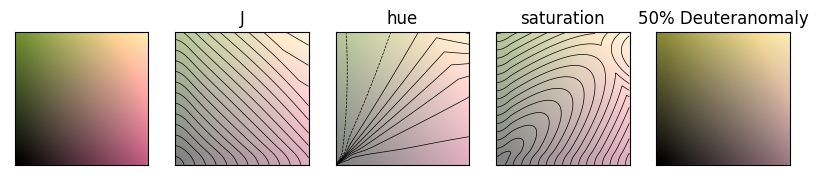

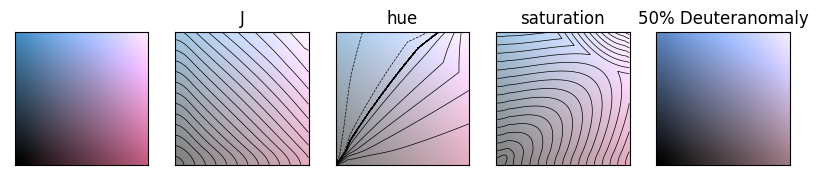

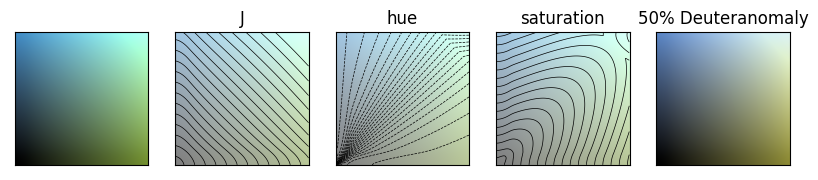

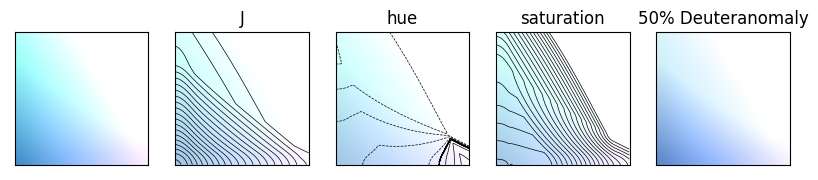

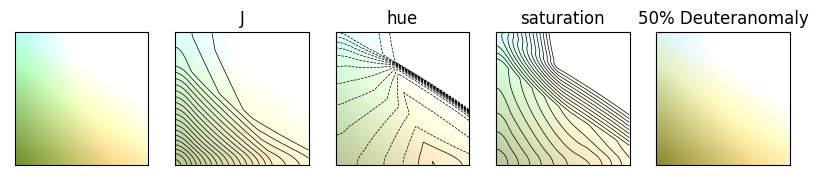

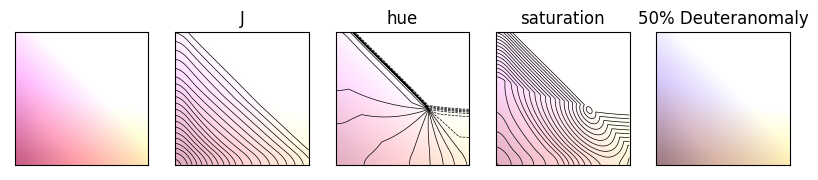

In [6]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77, 0.75) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap *3/2/ cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddC0'] = cmap[:,0,0]
colorbar_dict['3VarAddC1'] = cmap[0,:,0]
colorbar_dict['3VarAddC2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddC0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddC1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddC2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddD

max before adjustment: [1.37368513 1.51923053 1.49430307]
max after adjustment: [1.46240624 1.46240624 1.46240624]
values <0: 0
values >1: 10118898
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.69063528 0.71128709 0.70972876]
 [0.80350131 0.85702998 0.85172793]]
check for change in tColorbarshe first 3 values of the second:
 [[0.         0.         0.        ]
 [0.71772238 0.70302255 0.68725504]
 [0.87366538 0.8353017  0.79668655]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.70894294 0.70299096 0.7203168 ]
 [0.85074229 0.8355773  0.87949451]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

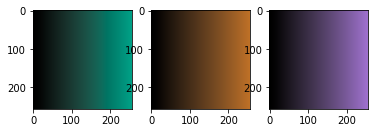

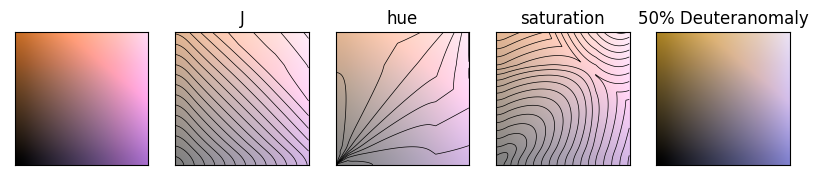

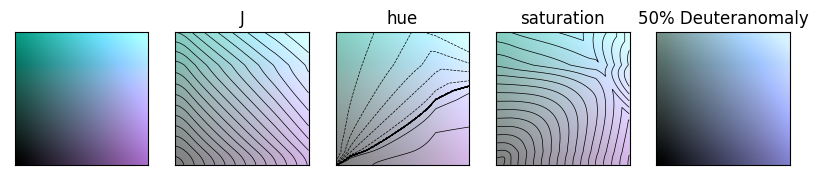

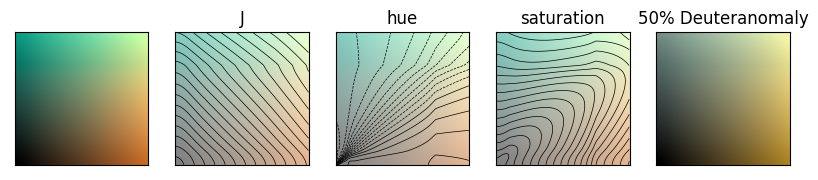

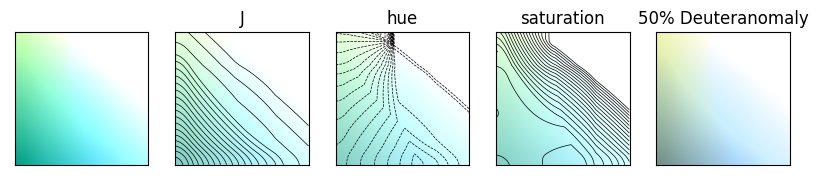

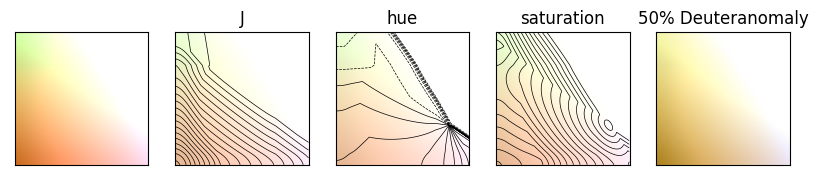

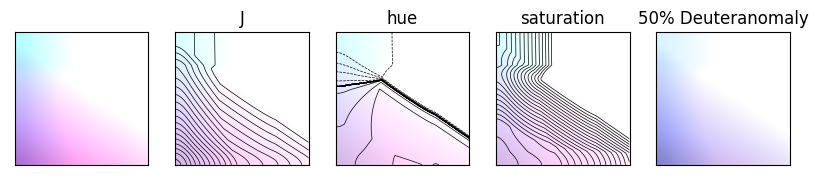

In [7]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77, 0.75) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap *3/2/ cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddD0'] = cmap[:,0,0]
colorbar_dict['3VarAddD1'] = cmap[0,:,0]
colorbar_dict['3VarAddD2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddD0'][0:3]*255))
print('check for change in tColorbarshe first 3 values of the second:\n', (colorbar_dict['3VarAddD1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddD2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubA

max before adjustment: [ 0.03209792  0.00255349 -0.02610108]
max after adjustment: [0.00285011 0.00285011 0.00285011]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


values <0: 3888
values >1: 0
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.57108363 254.73173019 254.87588078]
 [254.09540222 254.43294316 254.74070049]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.92254601 254.60693073 254.71546003]
 [254.82326647 254.17512022 254.40127308]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.60267951 254.75764824 254.50496834]
 [254.17333062 254.48393592 253.95002573]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

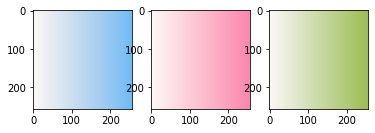

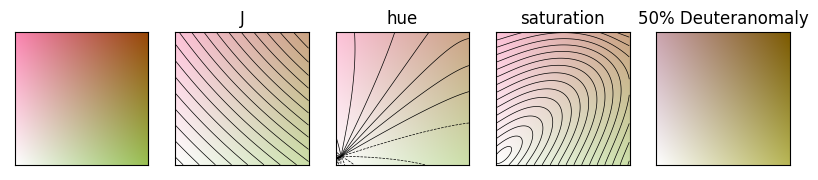

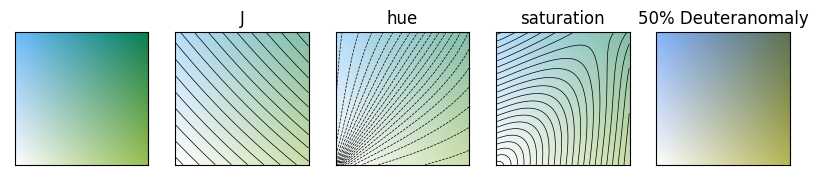

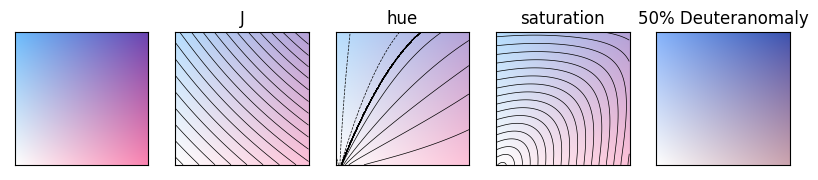

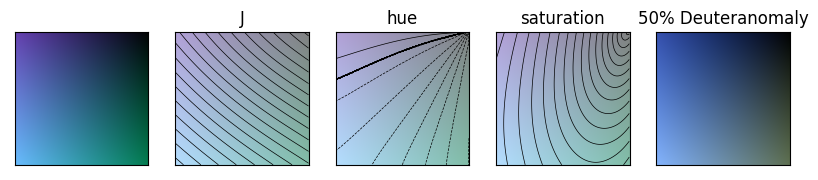

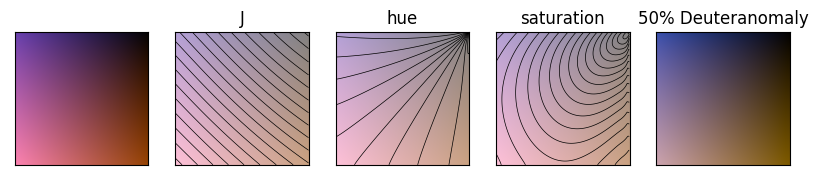

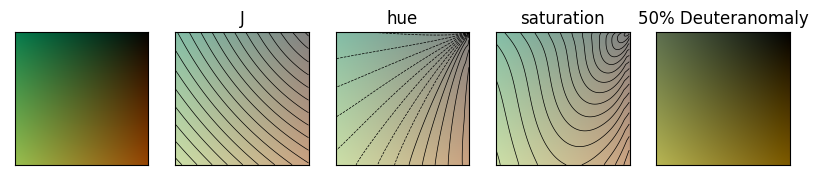

In [8]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (97, 128) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubA0'] = cmap[:,0,0]
colorbar_dict['3VarSubA1'] = cmap[0,:,0]
colorbar_dict['3VarSubA2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubA0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubB

max before adjustment: [-0.0621019   0.05190141  0.01061593]
max after adjustment: [0.00013848 0.00013848 0.00013848]
values <0: 72178
values >1: 6365
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.5165354  254.7901609  254.7619017 ]
 [253.97906191 254.56026472 254.49170512]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.74104847 254.68315485 254.92254869]
 [254.45680729 254.33309953 254.82911384]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.88788558 254.6721537  254.46101906]
 [254.76523485 254.30773981 253.8802851 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

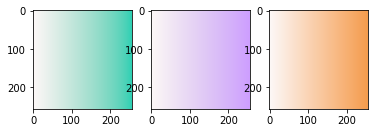

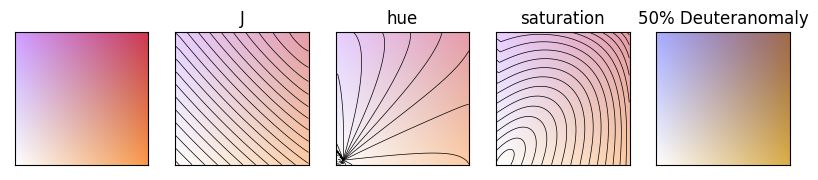

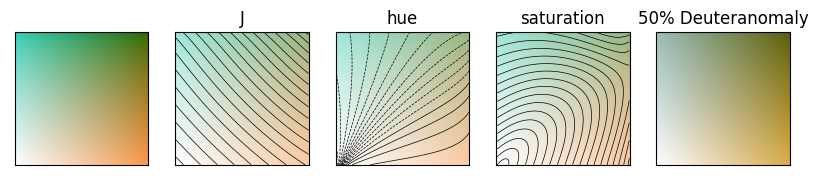

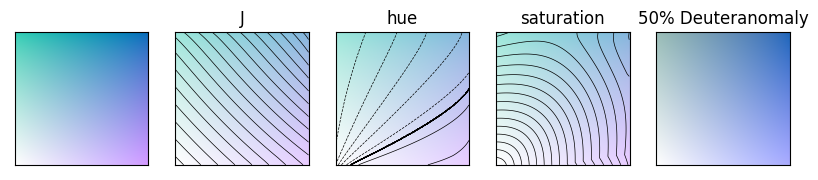

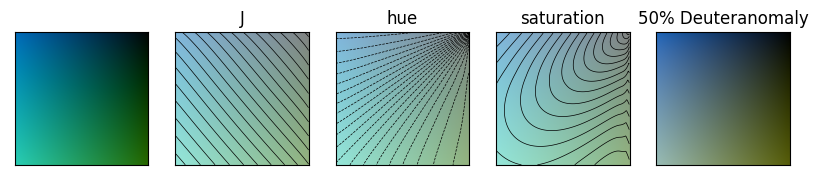

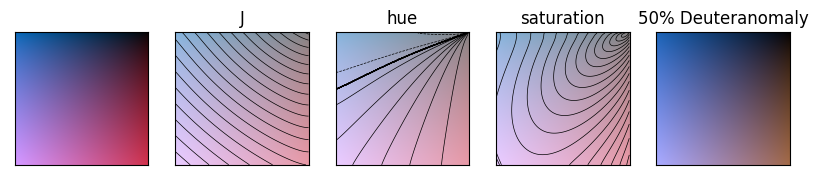

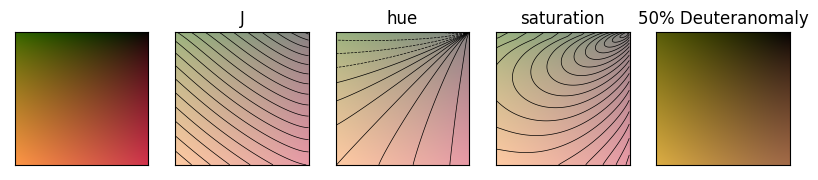

In [9]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (99, 128) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubB0'] = cmap[:,0,0]
colorbar_dict['3VarSubB1'] = cmap[0,:,0]
colorbar_dict['3VarSubB2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubB0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubB1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubB2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubC

max before adjustment: [-0.47112634 -0.46605892 -0.48444792]
max after adjustment: [-0.47387773 -0.47387773 -0.47387773]
values <0: 10893566
values >1: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.38375732 254.54463453 254.68896704]
 [253.70105516 254.03901108 254.34709404]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.73569863 254.41966139 254.52836098]
 [254.42975952 253.78088272 254.00734402]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.41541894 254.57057897 254.31754688]
 [253.77912268 254.09004356 253.5554993 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


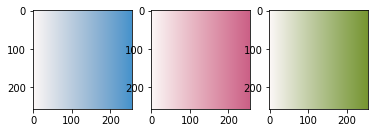

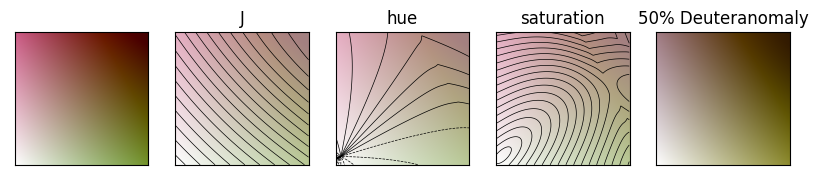

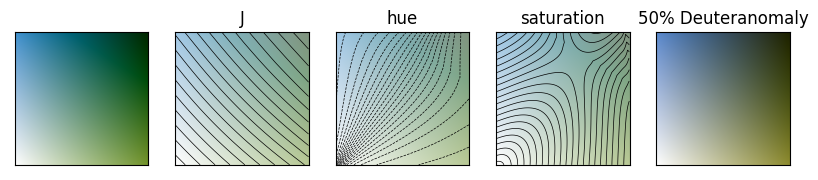

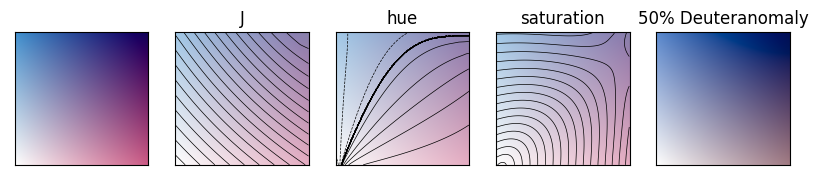

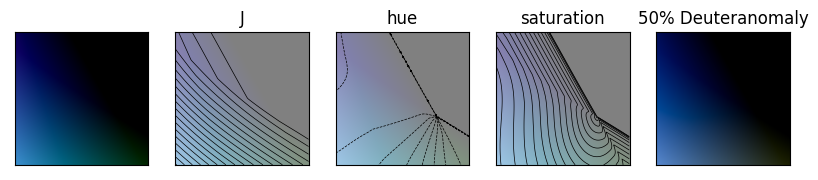

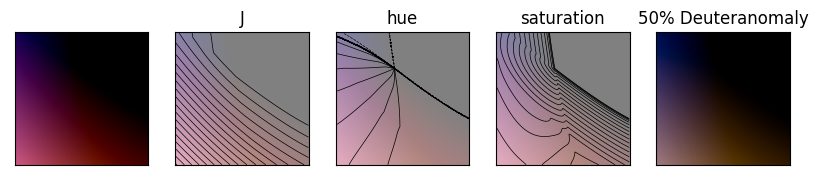

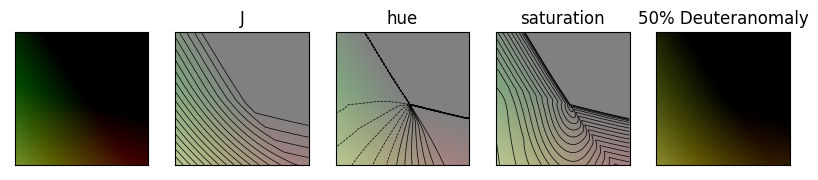

In [10]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubC0'] = cmap[:,0,0]
colorbar_dict['3VarSubC1'] = cmap[0,:,0]
colorbar_dict['3VarSubC2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubC0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubC1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubC2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubD

max before adjustment: [-0.61620633 -0.46694184 -0.49215281]
max after adjustment: [-0.52510032 -0.52510032 -0.52510032]
values <0: 12370704
values >1: 0
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.30981884 254.58385339 254.55553494]
 [253.54391616 254.1258563  254.05717289]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.53464664 254.47669327 254.7164467 ]
 [254.02222406 253.89841538 254.39506111]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.68174159 254.4656604  254.25422543]
 [254.33112258 253.87299112 253.4450288 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

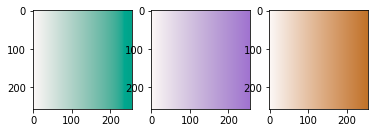

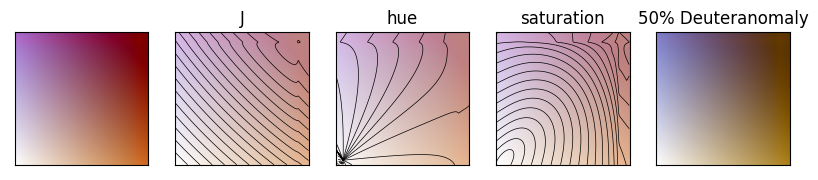

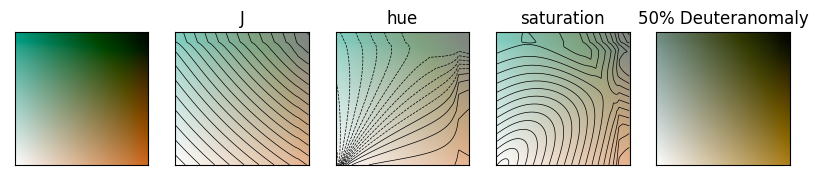

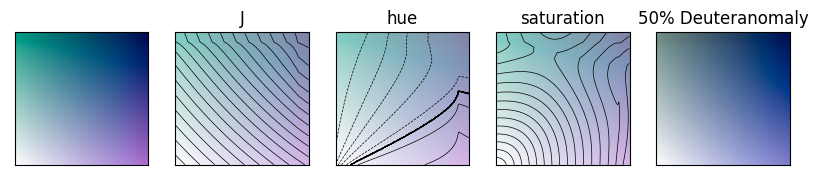

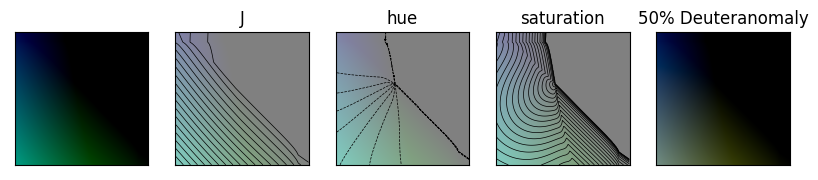

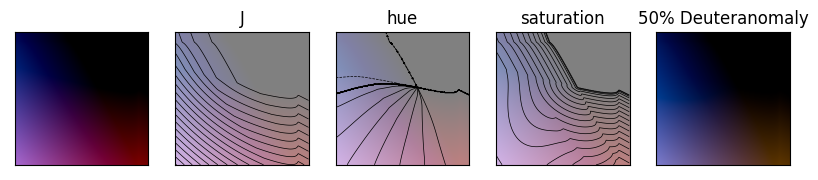

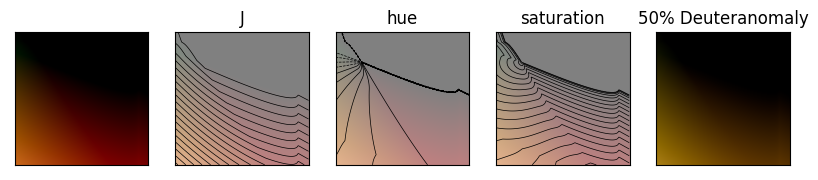

In [11]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128) # range in lightness 

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-120)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r-240)[256,:256]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubD0'] = cmap[:,0,0]
colorbar_dict['3VarSubD1'] = cmap[0,:,0]
colorbar_dict['3VarSubD2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubD0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubD1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubD2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

In [12]:
import pickle
with open(r"3vars.pickle", "wb") as output_file:
    pickle.dump(colorbar_dict, output_file)